<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue"></span>Final Project</h1>
<hr>

## Schema
- LotArea: Lot size in square feet
- Neighborhood: Physical locations within Ames city limits
- BldgType: Type of dwelling
       1Fam:	Single-family Detached	
       2FmCon:	Two-family Conversion; originally built as one-family dwelling
       Duplx:	Duplex
       TwnhsE:	Townhouse End Unit
       TwnhsI:	Townhouse Inside Unit
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
- MasVnrArea: Masonry veneer area in square feet
- TotalBsmtSF: Total square feet of basement area
- CentralAir: Central air conditioning
- 1stFlrSF: irst Floor square feet
- 2ndFlrSF: Second floor square feet
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)
- KitchenAbvGr: Kitchens above grade
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Fireplaces: Number of fireplaces
- GarageType: Garage location
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
- GarageYrBlt: Year garage was built
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- MoSold: Month Sold (MM)
- YrSold: Year Sold (YYYY)
- SalePrice: Dollar amount unit sold for
- Siding: Exterior covering on house

The outline to follow has been included down below. Each topic has the steps included with a blank cell, feel free to create as many new cells to keep your code separated.

Extra challenge:  If you want to make a categorical prediction, create a new column and bin the SalePrice into three categories (small, medium and large) then remove the SalePrice and try to predict that new column.

<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue"></span> Exploratory Analysis</h1>
<hr>

### First, let's import libraries and load the dataset.

In [1]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)

# Matplotlib for visualization
from matplotlib import pyplot as plt

# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns

In [2]:
# read in csv
df = pd.read_csv('project_files/house.csv')

# 1. Basic information

In [3]:
# Dataframe dimensions
df.shape

(1460, 27)

In [4]:
# Column datatypes
df.dtypes

LotArea           int64
Neighborhood     object
BldgType         object
YearBuilt         int64
YearRemodAdd      int64
MasVnrArea      float64
TotalBsmtSF       int64
CentralAir       object
1stFlrSF          int64
2ndFlrSF          int64
GrLivArea         int64
BsmtFullBath      int64
BsmtHalfBath      int64
FullBath          int64
HalfBath          int64
BedroomAbvGr      int64
KitchenAbvGr      int64
TotRmsAbvGrd      int64
Fireplaces        int64
GarageType       object
GarageYrBlt     float64
GarageCars        int64
GarageArea        int64
MoSold            int64
YrSold            int64
SalePrice         int64
Siding           object
dtype: object

In [5]:
# Display the head
df.head()

,LotArea,Neighborhood,BldgType,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageCars,GarageArea,MoSold,YrSold,SalePrice,Siding
0,8450,CollgCr,1Fam,2003,2003,196.0,856,Y,856,854,1710,1,0,2,1,3,1,8,0,Attchd,2003.0,2,548,2,2008,208500,VinylSd
1,9600,Veenker,1Fam,1976,1976,0.0,1262,Y,1262,0,1262,0,1,2,0,3,1,6,1,Attchd,1976.0,2,460,5,2007,181500,MetalSd
2,11250,CollgCr,1Fam,2001,2002,162.0,920,Y,920,866,1786,1,0,2,1,3,1,6,1,Attchd,2001.0,2,608,9,2008,223500,VinylSd
3,9550,Crawfor,1Fam,1915,1970,0.0,756,Y,961,756,1717,1,0,1,0,3,1,7,1,Detchd,1998.0,3,642,2,2006,140000,Wd Sdng
4,14260,NoRidge,1Fam,2000,2000,350.0,1145,Y,1145,1053,2198,1,0,2,1,4,1,9,1,Attchd,2000.0,3,836,12,2008,250000,VinylSd


In [6]:
# Display last 5 rows of data
df.tail()

,LotArea,Neighborhood,BldgType,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageCars,GarageArea,MoSold,YrSold,SalePrice,Siding
1455,7917,Gilbert,1Fam,1999,2000,0.0,953,Y,953,694,1647,0,0,2,1,3,1,7,1,Attchd,1999.0,2,460,8,2007,175000,VinylSd
1456,13175,NWAmes,1Fam,1978,1988,119.0,1542,Y,2073,0,2073,1,0,2,0,3,1,7,2,Attchd,1978.0,2,500,2,2010,210000,Plywood
1457,9042,Crawfor,1Fam,1941,2006,0.0,1152,Y,1188,1152,2340,0,0,2,0,4,1,9,2,Attchd,1941.0,1,252,5,2010,266500,CemntBd
1458,9717,NAmes,1Fam,1950,1996,0.0,1078,Y,1078,0,1078,1,0,1,0,2,1,5,0,Attchd,1950.0,1,240,4,2010,142125,MetalSd
1459,9937,Edwards,1Fam,1965,1965,0.0,1256,Y,1256,0,1256,1,0,1,1,3,1,6,0,Attchd,1965.0,1,276,6,2008,147500,HdBoard


In [7]:
# Loop through categorical feature names and print each one
for features in df.dtypes[df.dtypes == 'object'].index:
    print(features)

Neighborhood
BldgType
CentralAir
GarageType
Siding


# 2. Distributions of numeric features

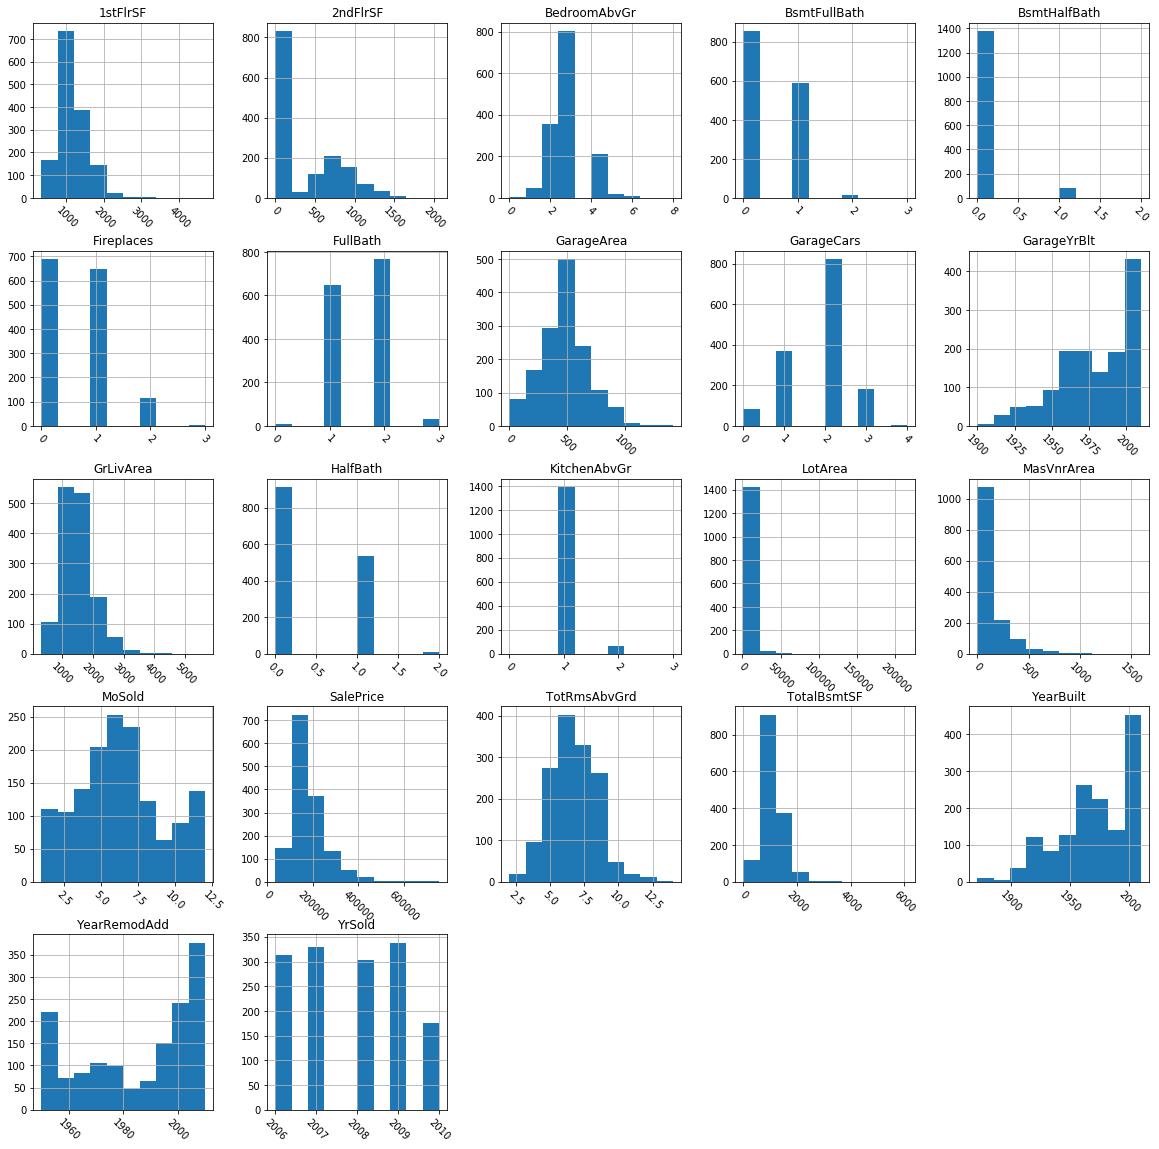

In [8]:
# Plot histogram grid
df.hist(xrot=-45, figsize=(20, 20))
# Clear the text "residue"
plt.show()

In [9]:
# Summarize numerical features
df.describe()

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1971.267808,1984.865753,103.685262,1057.429452,1162.626712,346.992466,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,6.321918,2007.815753,180921.195890
std,9981.264932,30.202904,20.645407,181.066207,438.705324,386.587738,436.528436,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,2.703626,1.328095,79442.502883
min,1300.000000,1872.000000,1950.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,7553.500000,1954.000000,1967.000000,0.000000,795.750000,882.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,5.000000,2007.000000,129975.000000
50%,9478.500000,1973.000000,1994.000000,0.000000,991.500000,1087.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,6.000000,2008.000000,163000.000000
75%,11601.500000,2000.000000,2004.000000,166.000000,1298.250000,1391.250000,728.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,8.000000,2009.000000,214000.000000
max,215245.000000,2010.000000,2010.000000,1600.000000,6110.000000,4692.000000,2065.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,12.000000,2010.000000,755000.000000


# 3. Distributions of categorical features

In [10]:
# Summarize categorical features
df.describe(include=["object"])

,Neighborhood,BldgType,CentralAir,GarageType,Siding
count,1460,1460,1460,1379,1460
unique,25,5,2,6,15
top,NAmes,1Fam,Y,Attchd,VinylSd
freq,225,1220,1365,870,515


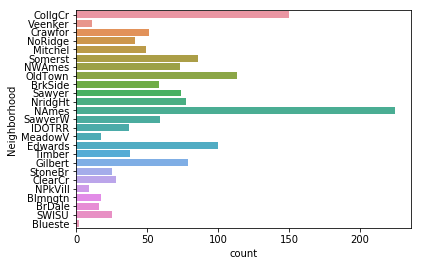

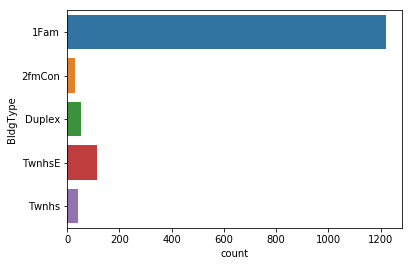

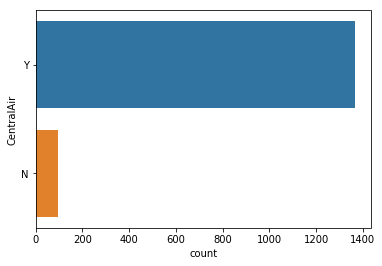

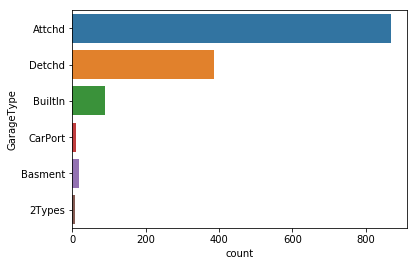

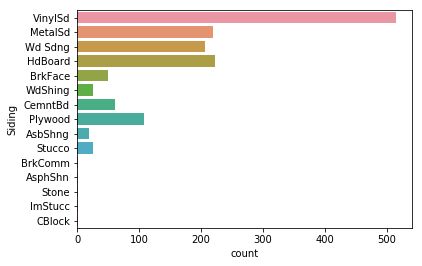

In [11]:
# Plot bar plot for each categorical feature
for features in df.dtypes[df.dtypes == "object"].index: 
    sns.countplot(y=features, data=df)
    plt.show()

# 4. Segmentations

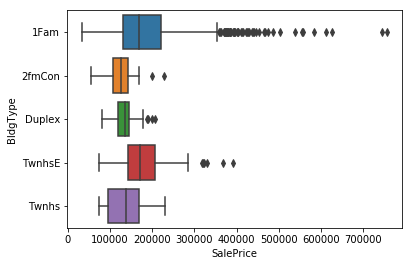

In [12]:
# Segment tx_price by property_type and plot distributions
sns.boxplot(y="BldgType", x="SalePrice", data=df)

In [13]:
# Segment by property_type and display the means within each class
df.groupby("BldgType").mean()

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,MoSold,YrSold,SalePrice
BldgType,,,,,,,,,,,,,,,,,,,,,,
1Fam,11240.634426,1969.672951,1984.628689,101.948063,1074.087705,1175.183607,358.125410,1539.492623,0.412295,0.058197,1.545902,0.390164,2.927869,1.005738,6.603279,0.650820,1977.095197,1.780328,482.083607,6.355738,2007.816393,185763.807377
2fmCon,15785.064516,1929.032258,1971.032258,15.161290,845.741935,1041.516129,495.774194,1561.451613,0.548387,0.032258,1.548387,0.064516,3.354839,1.580645,7.225806,0.419355,1955.272727,1.225806,348.419355,5.322581,2007.709677,128432.258065
Duplex,9720.057692,1967.173077,1970.269231,111.000000,958.461538,1325.615385,241.692308,1567.307692,0.500000,0.076923,1.807692,0.269231,3.557692,1.826923,7.692308,0.134615,1971.875000,1.673077,426.634615,6.846154,2007.807692,133541.076923
Twnhs,2391.209302,1986.325581,1988.976744,156.279070,756.534884,763.511628,511.046512,1276.418605,0.372093,0.023256,1.604651,0.674419,2.372093,1.000000,5.558140,0.255814,1989.421053,1.441860,355.255814,6.209302,2007.883721,135911.627907
TwnhsE,4766.605263,1996.008772,1996.271930,123.238938,1095.359649,1137.377193,173.543860,1312.324561,0.517544,0.061404,1.649123,0.333333,1.947368,1.000000,5.236842,0.614035,1996.265487,1.938596,474.973684,6.035088,2007.815789,181959.342105


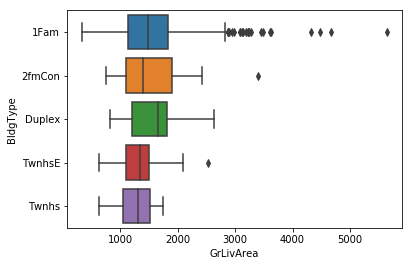

In [14]:
# Segment sqft by sqft and property_type distributions
sns.boxplot(y="BldgType", x="GrLivArea", data=df)

In [15]:
# Segment by property_type and display the means and standard deviations within each class
df.groupby("BldgType").agg([np.mean, np.std])

LotArea                  YearBuilt            YearRemodAdd  \
                  mean           std         mean        std         mean   
BldgType                                                                    
1Fam      11240.634426   9578.994040  1969.672951  30.508549  1984.628689   
2fmCon    15785.064516  28406.567962  1929.032258  24.805220  1971.032258   
Duplex     9720.057692   3146.827811  1967.173077  15.369592  1970.269231   
Twnhs      2391.209302    996.746841  1986.325581  15.252979  1988.976744   
TwnhsE     4766.605263   2315.905983  1996.008772  12.347832  1996.271930   

                     MasVnrArea              TotalBsmtSF              \
                std        mean         std         mean         std   
BldgType                                                               
1Fam      21.023265  101.948063  182.594846  1074.087705  434.794389   
2fmCon    20.916475   15.161290   42.753633   845.741935  349.820332   
Duplex    13.645534  111.000000  159.363317   958.461538  656.291616   
Twnhs     15.569336  156.279070  154.580743   756.534884  260.004519   
TwnhsE    12.502237  123.238938  198.131057  1095.359649  371.364171   

             1stFlrSF                2ndFlrSF                GrLivArea  \
                 mean         std        mean         std         mean   
BldgType                                                                 
1Fam      1175.183607  386.188012  358.125410  446.638496  1539.492623   
2fmCon    1041.516129  320.334395  495.774194  423.508812  1561.451613   
Duplex    1325.615385  331.027998  241.692308  438.714680  1567.307692   
Twnhs      763.511628  257.786029  511.046512  287.284905  1276.418605   
TwnhsE    1137.377193  374.352548  173.543860  300.225907  1312.324561   

                     BsmtFullBath           BsmtHalfBath            FullBath  \
                 std         mean       std         mean       std      mean   
BldgType                                                                       
1Fam      543.615829     0.412295  0.502345     0.058197  0.234211  1.545902   
2fmCon    578.277375     0.548387  0.567962     0.032258  0.179605  1.548387   
Duplex    443.860318     0.500000  0.804400     0.076923  0.334087  1.807692   
Twnhs     308.561195     0.372093  0.489083     0.023256  0.152499  1.604651   
TwnhsE    304.636342     0.517544  0.519231     0.061404  0.275395  1.649123   

                    HalfBath           BedroomAbvGr           KitchenAbvGr  \
               std      mean       std         mean       std         mean   
BldgType                                                                     
1Fam      0.554221  0.390164  0.494666     2.927869  0.700201     1.005738   
2fmCon    0.505879  0.064516  0.249731     3.354839  1.305077     1.580645   
Duplex    0.595357  0.269231  0.689285     3.557692  1.419935     1.826923   
Twnhs     0.494712  0.674419  0.474137     2.372093  0.690867     1.000000   
TwnhsE    0.497471  0.333333  0.491821     1.947368  0.701983     1.000000   

                   TotRmsAbvGrd           Fireplaces            GarageYrBlt  \
               std         mean       std       mean       std         mean   
BldgType                                                                      
1Fam      0.085733     6.603279  1.547176   0.650820  0.653914  1977.095197   
2fmCon    0.564163     7.225806  2.261411   0.419355  0.672022  1955.272727   
Duplex    0.430283     7.692308  2.156054   0.134615  0.486236  1971.875000   
Twnhs     0.000000     5.558140  1.201236   0.255814  0.441481  1989.421053   
TwnhsE    0.000000     5.236842  1.199577   0.614035  0.523919  1996.265487   

                    GarageCars            GarageArea                MoSold  \
                std       mean       std        mean         std      mean   
BldgType                                                                     
1Fam      25.175443   1.780328  0.740888  482.083607  214.856057  6.355738   
2fmCon    24.9307

# 5. Correlations

In [16]:
# Calculate correlations between numeric features
correlations = df.corr()
correlations = correlations * 100

In [17]:
# Generate a mask for the upper triangle
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

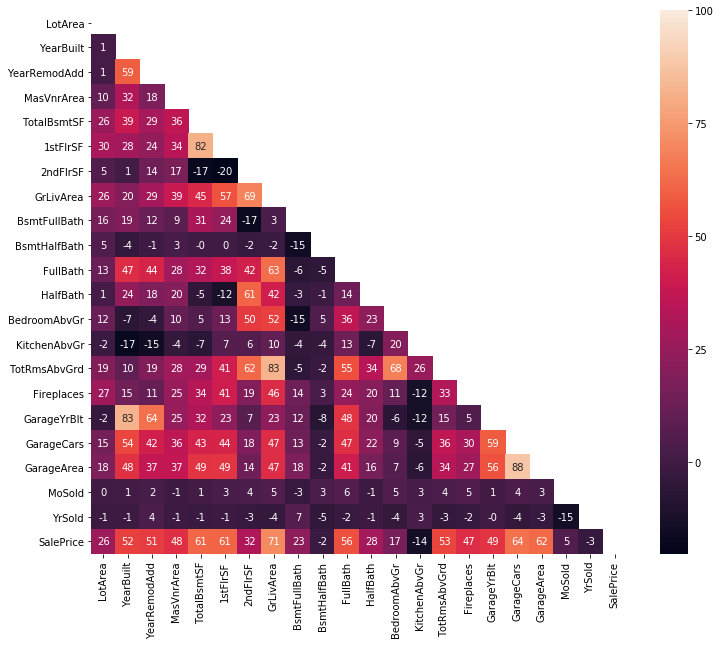

In [18]:
# Make the figsize 12 x 10
plt.figure(figsize=(12, 10))
# Plot heatmap of correlations
sns.heatmap(correlations, annot=True, fmt='.0f', mask=mask)

<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue"></span> Data Cleaning</h1>
<hr>

# 1. Drop unwanted observations

In [19]:
# Print shape of dataframe
print(df.shape)

# Drop any duplicates
df.drop_duplicates(inplace=True)

# Print shape of new dataframe to compare
print(df.shape)
df.head()

(1460, 27)
(1460, 27)


,LotArea,Neighborhood,BldgType,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageCars,GarageArea,MoSold,YrSold,SalePrice,Siding
0,8450,CollgCr,1Fam,2003,2003,196.0,856,Y,856,854,1710,1,0,2,1,3,1,8,0,Attchd,2003.0,2,548,2,2008,208500,VinylSd
1,9600,Veenker,1Fam,1976,1976,0.0,1262,Y,1262,0,1262,0,1,2,0,3,1,6,1,Attchd,1976.0,2,460,5,2007,181500,MetalSd
2,11250,CollgCr,1Fam,2001,2002,162.0,920,Y,920,866,1786,1,0,2,1,3,1,6,1,Attchd,2001.0,2,608,9,2008,223500,VinylSd
3,9550,Crawfor,1Fam,1915,1970,0.0,756,Y,961,756,1717,1,0,1,0,3,1,7,1,Detchd,1998.0,3,642,2,2006,140000,Wd Sdng
4,14260,NoRidge,1Fam,2000,2000,350.0,1145,Y,1145,1053,2198,1,0,2,1,4,1,9,1,Attchd,2000.0,3,836,12,2008,250000,VinylSd


# 2. Fix structural errors

# 3. Remove unwanted outliers

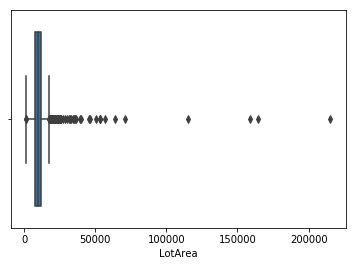

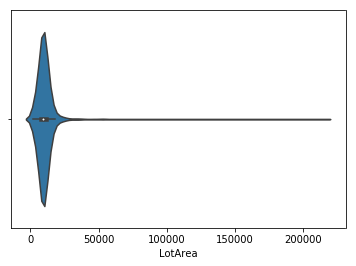

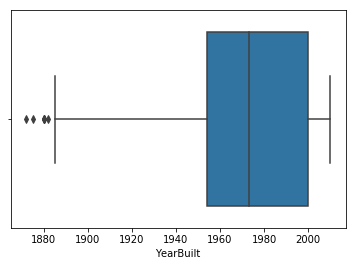

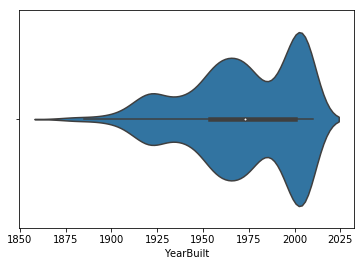

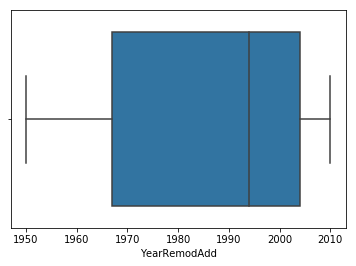

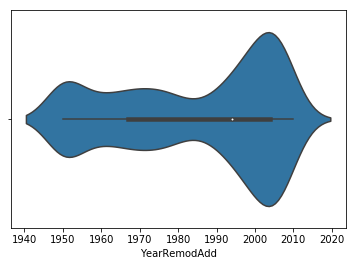

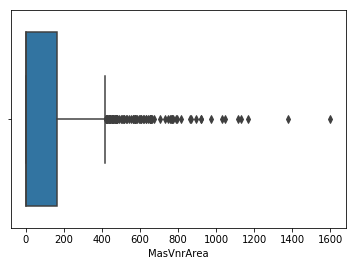

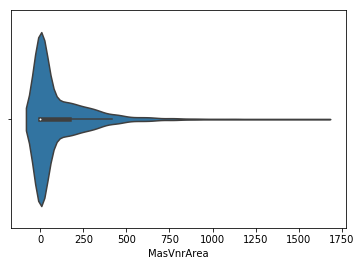

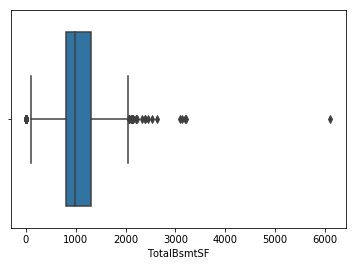

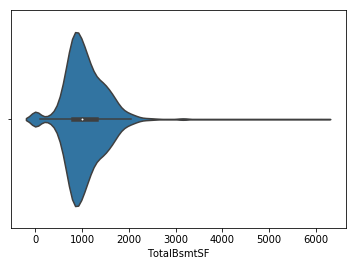

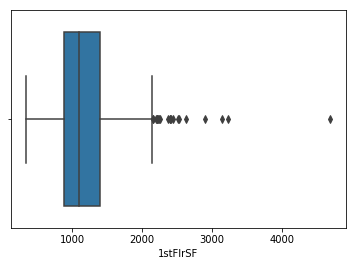

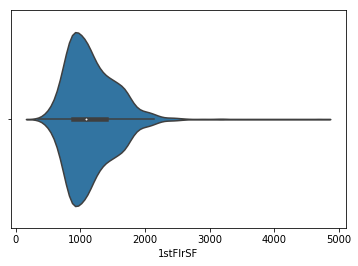

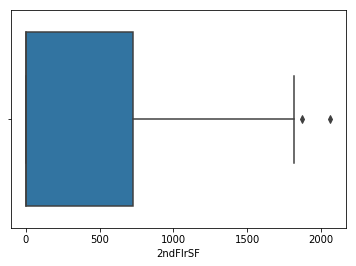

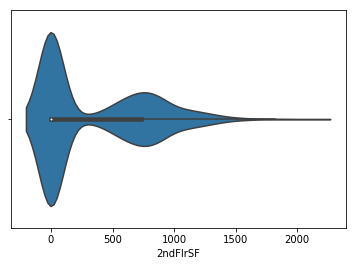

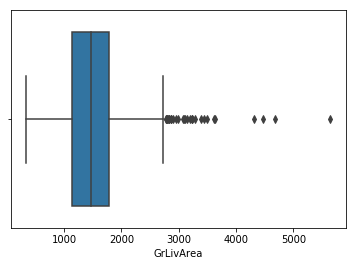

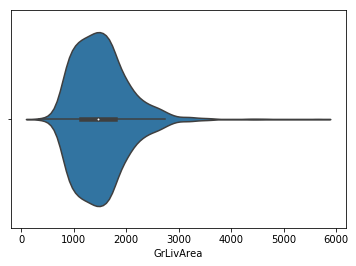

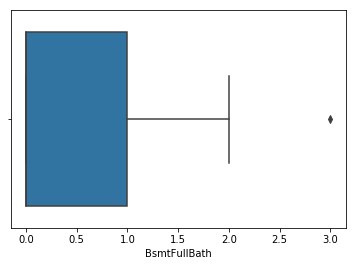

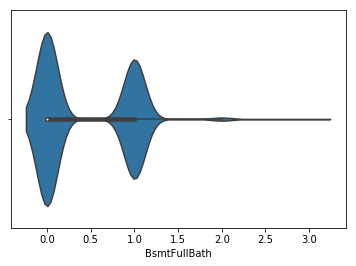

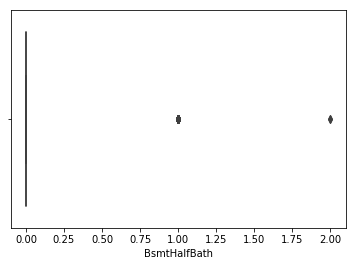

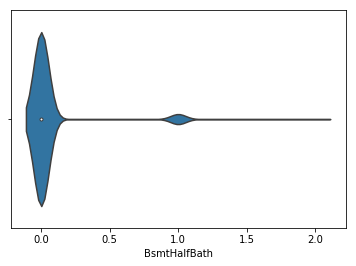

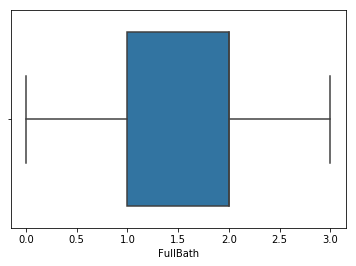

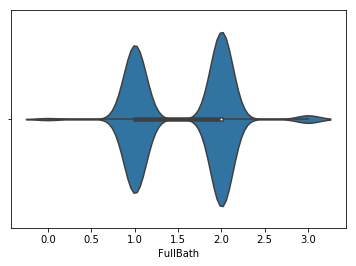

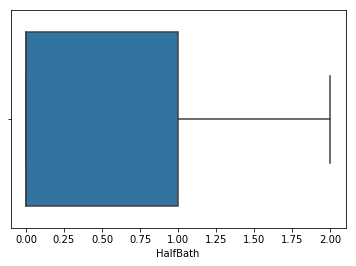

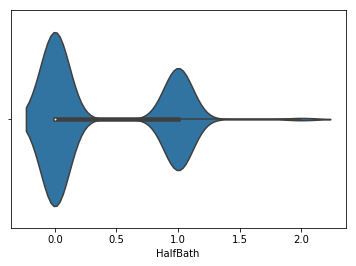

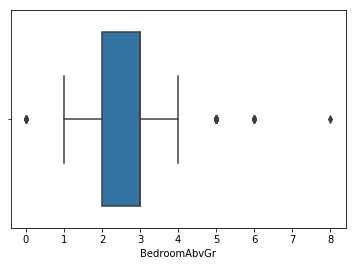

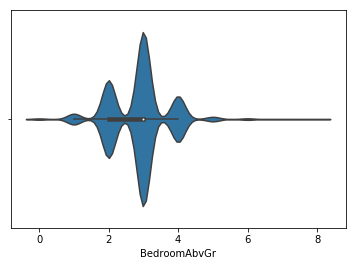

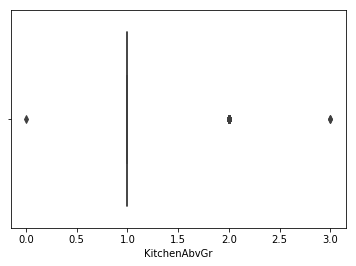

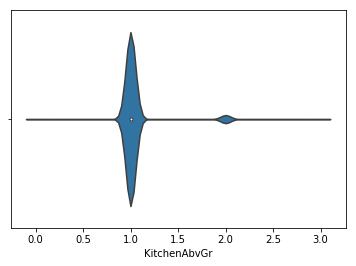

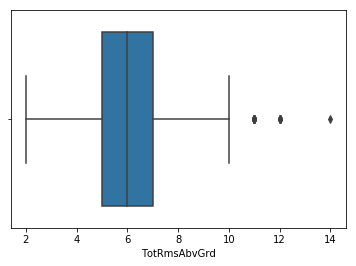

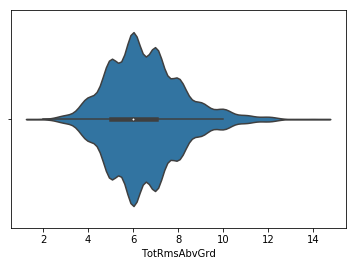

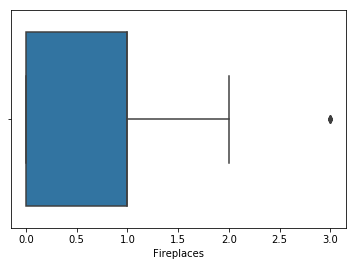

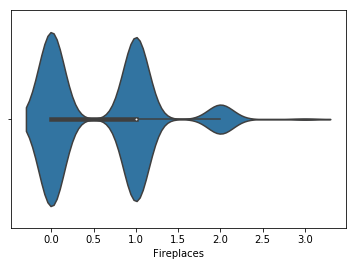

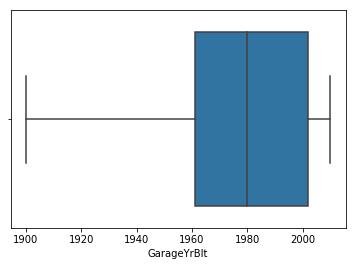

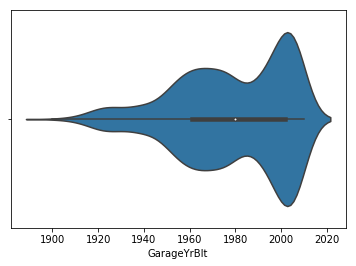

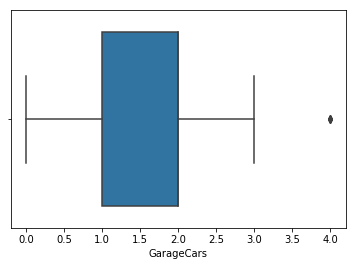

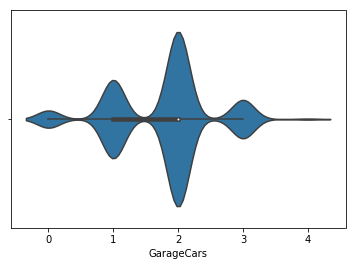

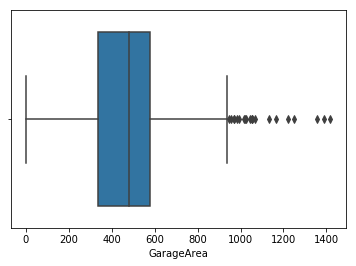

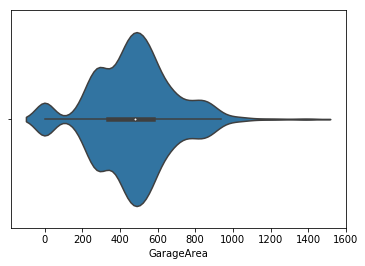

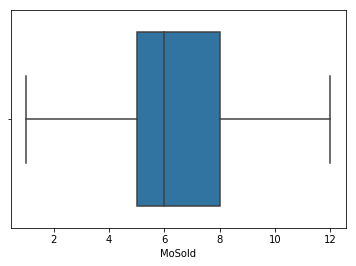

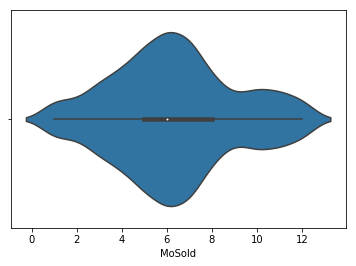

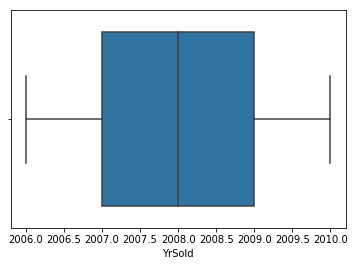

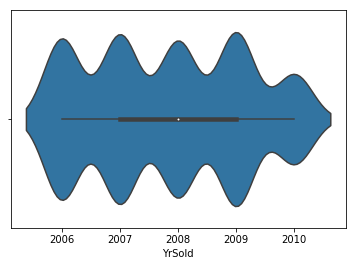

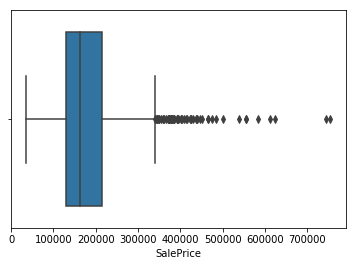

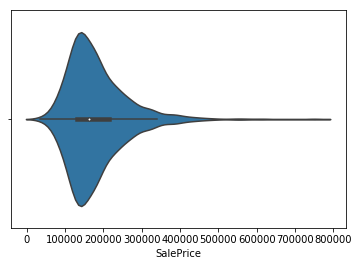

In [20]:
# Box plot of 'tx_price' using the Seaborn library
for features in df.dtypes[df.dtypes != "object"].index:
    sns.boxplot(df[features])
    plt.show()
    sns.violinplot(df[features])
    plt.show()

# 4. Label missing categorical data

In [21]:
# Display unique values for columns with missing values
df.GarageType.unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [22]:
# Fill missing GarageType with 'Missing'
df['GarageType'] = df.GarageType.fillna('Missing')

# Display unique values for GarageType to confirm changes
df.GarageType.unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', 'Missing', 'Basment',
       '2Types'], dtype=object)

# 5. Flag and fill missing numeric data

In [23]:
# Display NaN counts
for name in df.columns:
    print(name, df[name].isna().sum())

LotArea 0
Neighborhood 0
BldgType 0
YearBuilt 0
YearRemodAdd 0
MasVnrArea 8
TotalBsmtSF 0
CentralAir 0
1stFlrSF 0
2ndFlrSF 0
GrLivArea 0
BsmtFullBath 0
BsmtHalfBath 0
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchenAbvGr 0
TotRmsAbvGrd 0
Fireplaces 0
GarageType 0
GarageYrBlt 81
GarageCars 0
GarageArea 0
MoSold 0
YrSold 0
SalePrice 0
Siding 0


In [24]:
# Display unique values for MasVnrArea with missing values
df.MasVnrArea.unique().astype(int)

array([                 196,                    0,                  162,
                        350,                  186,                  240,
                        286,                  306,                  212,
                        180,                  380,                  281,
                        640,                  200,                  246,
                        132,                  650,                  101,
                        412,                  272,                  456,
                       1031,                  178,                  573,
                        344,                  287,                  167,
                       1115,                   40,                  104,
                        576,                  443,                  468,
                         66,                   22,                  284,
                         76,                  203,                   68,
                        183,                   48, 

In [25]:
# Missing MasVnrArea values should be 0
df['MasVnrArea'] = df.MasVnrArea.fillna(0)

# Change from float to int
df.MasVnrArea = df.MasVnrArea.astype(int)

In [26]:
# Display unique values for columns with missing values
df.GarageYrBlt.unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [27]:
# Missing GarageYrBlt values should be 0
df['GarageYrBlt'] = df.GarageYrBlt.fillna(2020)

# Change from float to int
df.GarageYrBlt = df.GarageYrBlt.astype(int)

# Sort years
np.sort(df.GarageYrBlt.unique())

array([1900, 1906, 1908, 1910, 1914, 1915, 1916, 1918, 1920, 1921, 1922,
       1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933,
       1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1945, 1946,
       1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957,
       1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968,
       1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2020])

In [28]:
# Display NaN counts to confirm
for name in df.columns:
    print(name, df[name].isna().sum())

LotArea 0
Neighborhood 0
BldgType 0
YearBuilt 0
YearRemodAdd 0
MasVnrArea 0
TotalBsmtSF 0
CentralAir 0
1stFlrSF 0
2ndFlrSF 0
GrLivArea 0
BsmtFullBath 0
BsmtHalfBath 0
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchenAbvGr 0
TotRmsAbvGrd 0
Fireplaces 0
GarageType 0
GarageYrBlt 0
GarageCars 0
GarageArea 0
MoSold 0
YrSold 0
SalePrice 0
Siding 0


# 6. Save cleaned dataframe to new file

In [29]:
df.to_csv('project_files/cleaned_house_extra_credit.csv', index=None)

<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue"></span> Feature Engineering</h1>
<hr>

# 1. Start with domain knowledge

In [30]:
df.head()

,LotArea,Neighborhood,BldgType,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageCars,GarageArea,MoSold,YrSold,SalePrice,Siding
0,8450,CollgCr,1Fam,2003,2003,196,856,Y,856,854,1710,1,0,2,1,3,1,8,0,Attchd,2003,2,548,2,2008,208500,VinylSd
1,9600,Veenker,1Fam,1976,1976,0,1262,Y,1262,0,1262,0,1,2,0,3,1,6,1,Attchd,1976,2,460,5,2007,181500,MetalSd
2,11250,CollgCr,1Fam,2001,2002,162,920,Y,920,866,1786,1,0,2,1,3,1,6,1,Attchd,2001,2,608,9,2008,223500,VinylSd
3,9550,Crawfor,1Fam,1915,1970,0,756,Y,961,756,1717,1,0,1,0,3,1,7,1,Detchd,1998,3,642,2,2006,140000,Wd Sdng
4,14260,NoRidge,1Fam,2000,2000,350,1145,Y,1145,1053,2198,1,0,2,1,4,1,9,1,Attchd,2000,3,836,12,2008,250000,VinylSd


# 2. Create interaction features

In [31]:
df.BldgType.unique()

array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object)

# 3. Group sparse classes

In [32]:
df.BldgType.replace(['2fmCon', 'Duplex', 'TwnhsE','Twnhs'], '2FamDuplexTwnhs', inplace=True)

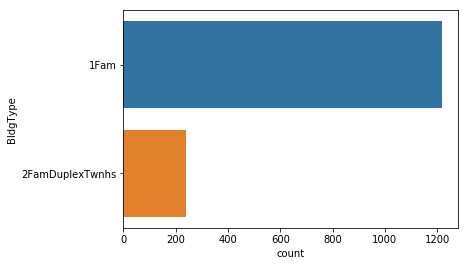

In [33]:
# Class distributions for 'bldgType'
sns.countplot(y='BldgType', data=df)

# 4. Encode dummy variables

In [34]:
df.head()

,LotArea,Neighborhood,BldgType,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageCars,GarageArea,MoSold,YrSold,SalePrice,Siding
0,8450,CollgCr,1Fam,2003,2003,196,856,Y,856,854,1710,1,0,2,1,3,1,8,0,Attchd,2003,2,548,2,2008,208500,VinylSd
1,9600,Veenker,1Fam,1976,1976,0,1262,Y,1262,0,1262,0,1,2,0,3,1,6,1,Attchd,1976,2,460,5,2007,181500,MetalSd
2,11250,CollgCr,1Fam,2001,2002,162,920,Y,920,866,1786,1,0,2,1,3,1,6,1,Attchd,2001,2,608,9,2008,223500,VinylSd
3,9550,Crawfor,1Fam,1915,1970,0,756,Y,961,756,1717,1,0,1,0,3,1,7,1,Detchd,1998,3,642,2,2006,140000,Wd Sdng
4,14260,NoRidge,1Fam,2000,2000,350,1145,Y,1145,1053,2198,1,0,2,1,4,1,9,1,Attchd,2000,3,836,12,2008,250000,VinylSd


In [35]:
df = pd.get_dummies(df,columns=['BldgType','Neighborhood','GarageType','Siding'])

In [36]:
df.CentralAir.unique()

array(['Y', 'N'], dtype=object)

In [37]:
df.CentralAir.replace('Y',1,inplace=True)
df.CentralAir.replace('N',0,inplace=True)
df.CentralAir.unique()

array([1, 0])

In [38]:
df.head()

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,MoSold,YrSold,SalePrice,BldgType_1Fam,BldgType_2FamDuplexTwnhs,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Missing,Siding_AsbShng,Siding_AsphShn,Siding_BrkComm,Siding_BrkFace,Siding_CBlock,Siding_CemntBd,Siding_HdBoard,Siding_ImStucc,Siding_MetalSd,Siding_Plywood,Siding_Stone,Siding_Stucco,Siding_VinylSd,Siding_Wd Sdng,Siding_WdShing
0,8450,2003,2003,196,856,1,856,854,1710,1,0,2,1,3,1,8,0,2003,2,548,2,2008,208500,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,9600,1976,1976,0,1262,1,1262,0,1262,0,1,2,0,3,1,6,1,1976,2,460,5,2007,181500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,11250,2001,2002,162,920,1,920,866,1786,1,0,2,1,3,1,6,1,2001,2,608,9,2008,223500,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,9550,1915,1970,0,756,1,961,756,1717,1,0,1,0,3,1,7,1,1998,3,642,2,2006,140000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,14260,2000,2000,350,1145,1,1145,1053,2198,1,0,2,1,4,1,9,1,2000,3,836,12,2008,250000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


# 5. Bin SalePrice into 3 categories

In [39]:
# List to hold categorical values
target_price = []

# low ($250000 or less)
# medium ($500000 to $250000)
# high (above $500000)

# Loop df and assign values to list based on condition stated above
for row in df['SalePrice']:
    if row <= 250000:
        target_price.append('Low')
    elif row <= 500000:
        target_price.append('Medium')
    else:
        target_price.append('High')
    
# Assign new values to dataframe
df['target_price'] = target_price

# Drop column with SalePrice
df.drop('SalePrice', axis=1, inplace=True)

# Confirm changes
df.head()

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,MoSold,YrSold,BldgType_1Fam,BldgType_2FamDuplexTwnhs,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Missing,Siding_AsbShng,Siding_AsphShn,Siding_BrkComm,Siding_BrkFace,Siding_CBlock,Siding_CemntBd,Siding_HdBoard,Siding_ImStucc,Siding_MetalSd,Siding_Plywood,Siding_Stone,Siding_Stucco,Siding_VinylSd,Siding_Wd Sdng,Siding_WdShing,target_price
0,8450,2003,2003,196,856,1,856,854,1710,1,0,2,1,3,1,8,0,2003,2,548,2,2008,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,Low
1,9600,1976,1976,0,1262,1,1262,0,1262,0,1,2,0,3,1,6,1,1976,2,460,5,2007,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Low
2,11250,2001,2002,162,920,1,920,866,1786,1,0,2,1,3,1,6,1,2001,2,608,9,2008,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,Low
3,9550,1915,1970,0,756,1,961,756,1717,1,0,1,0,3,1,7,1,1998,3,642,2,2006,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Low
4,14260,2000,2000,350,1145,1,1145,1053,2198,1,0,2,1,4,1,9,1,2000,3,836,12,2008,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,Low


# 6. Save analytical base table

In [40]:
# Save analytical base table
df.to_csv('project_files/analytical_base_table_extra_credit.csv', index=None)

In [2]:
# Read analytical base table
df = pd.read_csv('project_files/analytical_base_table_extra_credit.csv')
df.head()

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,MoSold,YrSold,BldgType_1Fam,BldgType_2FamDuplexTwnhs,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Missing,Siding_AsbShng,Siding_AsphShn,Siding_BrkComm,Siding_BrkFace,Siding_CBlock,Siding_CemntBd,Siding_HdBoard,Siding_ImStucc,Siding_MetalSd,Siding_Plywood,Siding_Stone,Siding_Stucco,Siding_VinylSd,Siding_Wd Sdng,Siding_WdShing,target_price
0,8450,2003,2003,196,856,1,856,854,1710,1,0,2,1,3,1,8,0,2003,2,548,2,2008,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,Low
1,9600,1976,1976,0,1262,1,1262,0,1262,0,1,2,0,3,1,6,1,1976,2,460,5,2007,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Low
2,11250,2001,2002,162,920,1,920,866,1786,1,0,2,1,3,1,6,1,2001,2,608,9,2008,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,Low
3,9550,1915,1970,0,756,1,961,756,1717,1,0,1,0,3,1,7,1,1998,3,642,2,2006,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Low
4,14260,2000,2000,350,1145,1,1145,1053,2198,1,0,2,1,4,1,9,1,2000,3,836,12,2008,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,Low


<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue"></span> Model Training</h1>
<hr>

In [3]:
# for Logistic Regression algorithm
from sklearn.linear_model import LogisticRegression  

#to split the dataset for training and testing
from sklearn.cross_validation import train_test_split 

# for K nearest neighbours
from sklearn.neighbors import KNeighborsClassifier  

#for Support Vector Machine (SVM) Algorithm
from sklearn import svm  

#for checking the model accuracy
from sklearn import metrics 

#for using Decision Tree Algoithm
from sklearn.tree import DecisionTreeClassifier 

# Function for splitting training and test set
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# 1. Split your dataset

In [4]:
# Create separate object for target variable
y = df.target_price

# Create separate object for input features
X = df.drop('target_price', axis=1)

# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

print( len(X_train), len(X_test), len(y_train), len(y_test) )

1168 292 1168 292


# 2. Build Model Pipelines

In [6]:
# Summary statistics of X_train
X_train.describe()

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,MoSold,YrSold,BldgType_1Fam,BldgType_2FamDuplexTwnhs,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Missing,Siding_AsbShng,Siding_AsphShn,Siding_BrkComm,Siding_BrkFace,Siding_CBlock,Siding_CemntBd,Siding_HdBoard,Siding_ImStucc,Siding_MetalSd,Siding_Plywood,Siding_Stone,Siding_Stucco,Siding_VinylSd,Siding_Wd Sdng,Siding_WdShing
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,10492.053938,1971.359589,1984.919521,105.511986,1065.883562,0.940925,1167.212329,346.873288,1519.826199,0.424658,0.056507,1.571918,0.377568,2.866438,1.046233,6.536815,0.607021,1980.988870,1.775685,479.077911,6.268836,2007.801370,0.833048,0.166952,0.011986,0.000856,0.010274,0.038527,0.018836,0.105308,0.032534,0.066781,0.051370,0.024829,0.014555,0.033390,0.156678,0.005993,0.049658,0.025685,0.056507,0.077911,0.018836,0.052226,0.037671,0.059932,0.017123,0.024829,0.007705,0.004281,0.598459,0.011130,0.053938,0.007705,0.273973,0.050514,0.013699,0.000856,0.000856,0.033390,0.000856,0.047945,0.146404,0.000856,0.154110,0.071918,0.001712,0.015411,0.357021,0.136986,0.017979
std,9137.170898,30.197990,20.544191,185.832557,444.979674,0.235867,391.374673,436.087964,533.407736,0.514877,0.238300,0.549175,0.500636,0.812902,0.218084,1.629951,0.641751,25.435047,0.741261,216.575370,2.710794,1.318226,0.373093,0.373093,0.108870,0.029260,0.100882,0.192548,0.136002,0.307082,0.177490,0.249749,0.220846,0.155670,0.119813,0.179731,0.363653,0.077216,0.217329,0.158261,0.230997,0.268146,0.136002,0.222578,0.190481,0.237462,0.129786,0.155670,0.087479,0.065316,0.490420,0.104956,0.225993,0.087479,0.446186,0.219096,0.116287,0.029260,0.029260,0.179731,0.029260,0.213742,0.353662,0.029260,0.361208,0.258462,0.041363,0.123233,0.479326,0.343980,0.132934
min,1477.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25

In [7]:
# Standardize X_train
X_train_new = (X_train - X_train.mean()) / X_train.std()
# Summary statistics of X_train_new
X_train_new.describe()

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,MoSold,YrSold,BldgType_1Fam,BldgType_2FamDuplexTwnhs,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Missing,Siding_AsbShng,Siding_AsphShn,Siding_BrkComm,Siding_BrkFace,Siding_CBlock,Siding_CemntBd,Siding_HdBoard,Siding_ImStucc,Siding_MetalSd,Siding_Plywood,Siding_Stone,Siding_Stucco,Siding_VinylSd,Siding_Wd Sdng,Siding_WdShing
count,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03
mean,8.317167e-19,1.203375e-16,-1.705827e-15,-2.608264e-16,-2.222347e-16,-4.286906e-17,-2.541726e-16,1.193870e-16,-7.694568e-17,-9.695441e-18,1.024200e-16,1.766091e-16,-1.756586e-16,1.370669e-16,-3.400058e-16,-2.756547e-18,-1.056993e-16,2.568626e-15,1.953346e-16,-4.895247e-17,-3.393404e-17,4.950397e-14,-6.483588e-16,6.508302e-16,2.061945e-16,-1.816053e-16,1.239258e-16,5.150465e-16,-1.041785e-16,-5.513094e-17,-3.978933e-16,6.710766e-17,-2.027963e-16,4.353443e-17,-3.489171e-16,-6.791561e-17,2.569292e-16,2.732784e-18,4.231299e-16,-2.599709e-17,4.658089e-16,-1.174859e-16,2.410553e-16,-1.054617e-16,-1.005189e-16,-2.683356e-16,3.265082e-17,1.996120e-17,1.590480e-16,-3.475388e-16,3.995092e-16,2.277240e-16,-1.001387e-16,-2.412216e-16,-6.625218e-17,-5.869544e-17,7.592386e-17,1.554835e-16,-1.804231e-17,1.739951e-16,1.489426e-16,3.399583e-16,7.309602e-17,-4.482359e-17,3.507468e-17,1.922929e-16,2.970417e-16,1.172530e-15,3.159573e-16,-6.539670e-17,1.825499e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.866351e-01,-3.290272e+00,-1.69972

In [8]:
# Function for creating model pipelines
from sklearn.pipeline import make_pipeline

# For standardization
from sklearn.preprocessing import StandardScaler

In [10]:
# Create pipelines dictionary
pipeline_dict = { 'svm' : make_pipeline(StandardScaler(), svm.SVC()),
                 'lr' : make_pipeline(StandardScaler(), LogisticRegression()),
                 'dt' : make_pipeline(StandardScaler(), DecisionTreeClassifier()),
                 'knn' : make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=9))}

In [11]:
# Check that we have all 4 algorithms, and that they are all pipelines
for key, value in pipeline_dict.items():
    print( key, type(value) )

svm <class 'sklearn.pipeline.Pipeline'>
lr <class 'sklearn.pipeline.Pipeline'>
dt <class 'sklearn.pipeline.Pipeline'>
knn <class 'sklearn.pipeline.Pipeline'>


# 3. Declare hyperparameters to tune

In [49]:
# List tuneable hyperparameters of our Lasso pipeline
pipeline_dict['knn'].get_params()

{'memory': None,
 'steps': [('standardscaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('kneighborsclassifier',
   KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
              metric_params=None, n_jobs=1, n_neighbors=9, p=2,
              weights='uniform'))],
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'kneighborsclassifier': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=9, p=2,
            weights='uniform'),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': 1,
 'kneighborsclassifier__n_neighbors': 9,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights':

In [50]:
# SVM hyperparameters
svm_hyperparameters = { 'svc__C' : [0.001, 0.01, 0.1, 1, 10],
                        'svc__gamma' : [0.001, 0.01, 0.1, 1]}

# Logistic Regression hyperparameters
lr_hyperparameters = { 'logisticregression__C' : [0.001,0.01,0.1,1,10,100,1000]}

# Decision Tree hyperparameters
dt_hyperparameters = {  'decisiontreeclassifier__min_samples_split' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
                        'decisiontreeclassifier__min_samples_leaf' : [0.1, 0.2, 0.3, 0.4, 0.5]}

# KNN hyperparameters
knn_hyperparameters = { 'kneighborsclassifier__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [51]:
# Create hyperparameters dictionary
hyperparameters = {
    'svm' : svm_hyperparameters,
    'lr' : lr_hyperparameters,
    'dt' : dt_hyperparameters,
    'knn' : knn_hyperparameters
}

for key in ['svm', 'lr', 'dt', 'knn']:
    if key in hyperparameters:
        if type(hyperparameters[key]) is dict:
            print( key, 'was found in hyperparameters, and it is a grid.' )
        else:
            print( key, 'was found in hyperparameters, but it is not a grid.' )
    else:
        print( key, 'was not found in hyperparameters')

svm was found in hyperparameters, and it is a grid.
lr was found in hyperparameters, and it is a grid.
dt was found in hyperparameters, and it is a grid.
knn was found in hyperparameters, and it is a grid.


# 4. Fit and tune models with cross-validation

In [52]:
# Helper for cross-validation
from sklearn.model_selection import GridSearchCV

In [53]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipeline_dict.items():
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


svm has been fitted.


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


lr has been fitted.


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


dt has been fitted.


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


knn has been fitted.


In [54]:
# Check that we have 4 cross-validation objects
for key, value in fitted_models.items():
    print( key, type(value) )

svm <class 'sklearn.model_selection._search.GridSearchCV'>
lr <class 'sklearn.model_selection._search.GridSearchCV'>
dt <class 'sklearn.model_selection._search.GridSearchCV'>
knn <class 'sklearn.model_selection._search.GridSearchCV'>


In [55]:
from sklearn.exceptions import NotFittedError

for name, model in fitted_models.items():
    try:
        pred = model.predict(X_test)
        print(name, 'has been fitted.')
    except NotFittedError as e:
        print(repr(e))

svm has been fitted.
lr has been fitted.
dt has been fitted.
knn has been fitted.


# 5. Evaluate models and select winner

In [68]:
# Display best_score_ for each fitted model
for name, model in fitted_models.items():
    print(name, model.best_score_)

svm 0.9434931506849316
lr 0.9340753424657534
dt 0.9006849315068494
knn 0.9332191780821918
